In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
data = pd.read_csv('augmented_rgb_label.csv')

# Split input and output data
X = data.iloc[0:, [1,2,3,5]].values
y = data.iloc[0:, -1].values

# Standardize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8947368421052632


In [38]:
k_values = [i for i in range (3,25)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    

Text(0, 0.5, 'Accuracy Score')

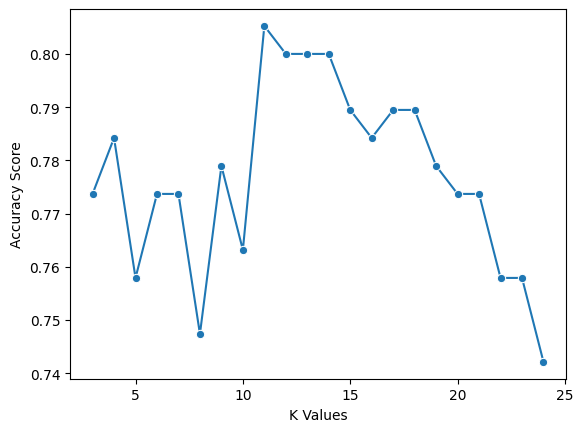

In [39]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [40]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [42]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')

print("Accuracy:", accuracy)

['no anaemia' 'no anaemia' 'severe' 'severe' 'no anaemia' 'severe'
 'no anaemia' 'severe' 'mild' 'severe' 'no anaemia' 'mild' 'severe' 'mild'
 'mild' 'severe' 'no anaemia' 'severe' 'severe' 'severe' 'no anaemia'
 'no anaemia' 'no anaemia' 'no anaemia' 'mild' 'mild' 'severe' 'severe'
 'no anaemia' 'severe' 'mild' 'severe' 'no anaemia' 'severe' 'mild' 'mild'
 'severe' 'severe']
['no anaemia' 'no anaemia' 'severe' 'severe' 'no anaemia' 'severe' 'mild'
 'severe' 'moderate' 'severe' 'no anaemia' 'mild' 'severe' 'mild' 'mild'
 'severe' 'no anaemia' 'severe' 'severe' 'severe' 'no anaemia'
 'no anaemia' 'no anaemia' 'mild' 'severe' 'no anaemia' 'severe' 'severe'
 'no anaemia' 'severe' 'mild' 'severe' 'mild' 'severe' 'mild' 'mild'
 'severe' 'severe']
Accuracy: 0.8421052631578947
